<a href="https://colab.research.google.com/github/Ty700/SteamDB-Data-Mining/blob/main/SteamDBMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining Project - Checkpoint 1
## Dataset Selection and Exploratory Data Analysis

**Author:** Tyler Scotti

**Date:** February 2026  

**Course:** Data Mining & Analysis

**Course Number:** CSCE 676

**Course Professor:** Caverlee, James

---

## Collaboration Declaration

1. **Collaborators:** None
2. **Web Sources:**
   - Amazon Reviews 2023: https://amazon-reviews-2023.github.io/
   - Steam Games Dataset: https://www.kaggle.com/datasets/fronkongames/steam-games-dataset
   - Spotify Tracks Dataset: https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset
   - Scikit-learn documentation: https://scikit-learn.org/
   - MLxtend documentation: http://rasbt.github.io/mlxtend/
3. AI Tools: Claude (Anthropic) for code structure, data cleaning logic, documentation, and EDA assistance
4. **Citations:**
   - Hou, Y., et al. (2024). "Bridging Language and Items for Retrieval and Recommendation." Amazon Reviews 2023.
   - FronKongames. (2024). "Steam Games Dataset." Kaggle.
---

## Section A: Identification of Candidate Datasets

This section identifies three candidate datasets, each supporting both course-level data mining techniques and at least one advanced technique not covered in the course curriculum.

---

### Dataset 1: Amazon Reviews 2023

**Dataset Name and Source:**  
Amazon Reviews 2023 Dataset (https://amazon-reviews-2023.github.io/)

**Course Topic Alignment:**  
- Text mining: TF-IDF vectorization, word embeddings
- Clustering: Grouping similar reviews
- Classification: Rating prediction from review text

**Potential Beyond-Course Techniques:**  
- Transformer-based sentiment analysis using pre-trained BERT or RoBERTa models
- Aspect-based sentiment analysis to identify specific product features
- Fine-tuning large language models for domain-specific review analysis

**Dataset Size and Structure:**  
- 571.54M reviews across all categories
- Can subset to specific category (e.g., "All_Beauty" with ~5.7M reviews)
- JSON format with one review per line

**Data Types:**  
- `rating`: Integer (1-5 stars)
- `title`: String (review title)
- `text`: String (review body)
- `parent_asin`: String (product ID)
- `user_id`: String (anonymized user identifier)
- `timestamp`: Unix timestamp
- `helpful_vote`: Integer (helpfulness votes)
- `verified_purchase`: Boolean

**Target Variable(s):**  
- Primary: `rating` (supervised learning for sentiment prediction)
- Secondary: `helpful_vote` (review quality prediction)

**Licensing or Usage Constraints:**  
- Available for research and educational purposes
- Requires citation of the source paper
- User IDs are anonymized to protect privacy

---

### Dataset 2: Steam Games Dataset

**Dataset Name and Source:**  
Steam Games Dataset (https://www.kaggle.com/datasets/fronkongames/steam-games-dataset)

**Course Topic Alignment:**  
- Frequent itemsets: Game tag co-occurrence analysis (treating tags as items in transactions)
- Association rules: Finding relationships between game features and success metrics
- Clustering: Grouping similar games based on features

**Potential Beyond-Course Techniques:**  
- Collaborative filtering using matrix factorization (SVD) for game recommendations
- Content-based recommendation systems using game features
- Hybrid recommendation combining collaborative and content-based approaches

**Dataset Size and Structure:**  
- ~85,000 games with comprehensive metadata
- Single CSV file format
- Manageable size for local processing without sampling

**Data Types:**  
- `name`: String (game title)
- `release_date`: Date
- `price`: Float (in USD)
- `dlc_count`: Integer
- `detailed_description`: String (game description)
- `tags`: List of strings (user-generated tags)
- `recommendations`: Integer (positive recommendation count)
- `user_score`: Float (0-100 scale)
- `Positive`, `Negative`: Integer counts

**Target Variable(s):**  
- Primary: `recommendations` (game popularity/success)
- Secondary: `user_score` (game quality rating)
- Could derive: recommendation rate (positive / total reviews)

**Licensing or Usage Constraints:**  
- Kaggle Community License
- Data scraped from publicly available Steam store pages
- Free to use for educational and research purposes

---

### Dataset 3: Spotify Tracks Dataset

**Dataset Name and Source:**  
Spotify Tracks Dataset (https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset)

**Course Topic Alignment:**  
- Clustering: Grouping songs by audio features (tempo, energy, danceability, etc.)
- Classification: Genre prediction from audio features
- Dimensionality reduction: PCA on audio features

**Potential Beyond-Course Techniques:**  
- Content-based music recommendation using cosine similarity on audio features
- Playlist generation algorithms
- Deep learning for audio feature extraction (though features are pre-computed here)

**Dataset Size and Structure:**  
- ~114,000 tracks with Spotify's pre-computed audio features
- CSV format with one track per row
- Moderate size suitable for local analysis

**Data Types:**  
- `track_id`: String (Spotify URI)
- `track_name`, `artists`: Strings
- `album_name`, `track_genre`: Strings
- Audio features (all floats, normalized 0-1 or specific ranges):
  - `danceability`, `energy`, `loudness`, `speechiness`
  - `acousticness`, `instrumentalness`, `liveness`, `valence`
  - `tempo`, `duration_ms`, `time_signature`, `key`, `mode`
- `popularity`: Integer (0-100)

**Target Variable(s):**  
- Primary: `track_genre` (multi-class classification)
- Secondary: `popularity` (regression for hit prediction)

**Licensing or Usage Constraints:**  
- Kaggle license for educational use
- Audio features computed by Spotify API
- Does not include actual audio files (only metadata and features)

## Section B: Comparative Analysis of Datasets

This section provides a structured comparison of the three candidate datasets across key dimensions relevant to data mining project success.

| **Dimension** | **Amazon Reviews 2023** | **Steam Games** | **Spotify Tracks** |
|--------------|------------------------|-----------------|-------------------|
| **Supported Data Mining Tasks** | **Course:** Text mining, TF-IDF, clustering<br>**External:** BERT sentiment analysis | **Course:** Frequent itemsets, association rules<br>**External:** Collaborative filtering (SVD) | **Course:** K-means, PCA, classification<br>**External:** Content-based filtering |
| **Data Quality Issues** | - 571M reviews, must sample<br>- Text noise, class imbalance<br>- Missing text entries | - Missing playtime/user counts<br>- Inconsistent tag formatting<br>- Sparse review data | - Missing genre labels<br>- Pre-normalized features<br>- Duplicate tracks |
| **Algorithmic Feasibility** | - Cannot load full dataset<br>- TF-IDF feasible on samples<br>- GPU preferred for transformers | - Full dataset fits in memory<br>- Apriori scales well<br>- Fast iteration | - Full dataset fits in memory<br>- K-means very fast<br>- No preprocessing needed |
| **Bias Considerations** | - Review bombing<br>- Category imbalance<br>- Temporal bias | - Popularity bias (AAA games)<br>- PC-only platform<br>- Western/English dominance | - Mainstream overrepresentation<br>- Playlist placement bias<br>- Language/region bias |
| **Ethical Considerations** | - Fake review generation risk<br>- Privacy (user IDs anonymized)<br>- Opinion manipulation potential | - Minimal concerns<br>- Public data only<br>- No PII | - Artist compensation disconnect<br>- Cultural influence<br>- Low individual harm risk |

## Section C: Dataset Selection and Justification

After careful comparison of the three candidate datasets, I have selected the **Steam Games Dataset** for this project.

---

### Selected Dataset: Steam Games Dataset

**Primary Reasons for Selection:**

1. **Strong Course Alignment**
   - Direct support for frequent itemsets and association rules
   - Clear extension to collaborative filtering
   - Game tags naturally form transactions for market basket analysis

2. **Optimal Data Scale**
   - Full dataset fits in memory
   - No sampling needed, eliminating bias
   - Fast iteration cycles

3. **Manageable Complexity**
   - Clean CSV format
   - Minimal preprocessing required
   - Intuitive gaming domain

4. **Rich Analysis Opportunities**
   - Multiple target variables that I can choose from
   - Temporal and tag patterns
   - Price vs. quality relationships

**Trade-offs Accepted:**

1. **Limited Text Mining** - Game descriptions aren't the primary focus, but tag analysis will do
2. **Platform-Specific Bias** - Scope is limited to Steam's Database
3. **Fewer Deep Learning Options** - Matrix factorization and association rules will suffice

**Expected Outcomes:**

- Frequent tag combinations for successful games
- Association rules linking features to high scores
- Collaborative filtering recommendations
- Comparison of pattern-based vs. model-based approaches

## Section D: Exploratory Data Analysis on the Steam Games Dataset

This section performs comprehensive exploratory data analysis on the selected Steam Games dataset.

In [157]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings

# Configuration
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries imported successfully")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

Libraries imported successfully
Pandas version: 2.2.2
NumPy version: 2.0.2


In [158]:
# Load the Steam Games dataset
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fronkongames/steam-games-dataset")

print("Path to dataset files:", path)

df = pd.read_csv("/kaggle/input/steam-games-dataset/games.csv")

print("Dataset loaded successfully!")
print(f"\nDataset shape: {df.shape}")
print(f"Number of games: {df.shape[0]:,}")
print(f"Number of features: {df.shape[1]}")

Using Colab cache for faster access to the 'steam-games-dataset' dataset.
Path to dataset files: /kaggle/input/steam-games-dataset
Dataset loaded successfully!

Dataset shape: (122611, 39)
Number of games: 122,611
Number of features: 39


### D.1: Data Cleaning and Column Correction

**Column Misalignment Issue:** Upon inspection, I found that the CSV headers were misaligned with the actual data. The header row and data rows don't correspond correctly:

- Column labeled 'AppID' actually contains **game names**
- Column labeled 'Name' actually contains **release dates**  
- Column labeled 'Release date' actually contains **estimated owners**

Thus, I found the need to clean the data up a bit prior to my EDA.

In [159]:
# Showcase misaligned columns - BEFORE
print("\nBEFORE CORRECTION:")
print("-" * 60)
before = df[df['AppID'].str.contains('Ark: Survival Evolved', case=False, na=False)]
print(before.to_dict())

# Save original data before overwriting
original_appid = df['AppID'].copy()
original_name = df['Name'].copy()
original_release = df['Release date'].copy()

df['AppID'] = df.index  # Real AppID from index
df['Name'] = original_appid  # Was in AppID column
df['Release date'] = original_name  # Was in Name column
df['Estimated owners'] = original_release  # Was in Release date column

# Showcase aligned columns - AFTER
print("\n\nAFTER CORRECTION:")
print("-" * 60)
after = df[df['Name'].str.contains('Ark: Survival Evolved', case=False, na=False)]
print(after.to_dict())
print("\n" + "="*60)


BEFORE CORRECTION:
------------------------------------------------------------
{'AppID': {346110: 'ARK: Survival Evolved'}, 'Name': {346110: 'Aug 27, 2017'}, 'Release date': {346110: '20000000 - 50000000'}, 'Estimated owners': {346110: 22170}, 'Peak CCU': {346110: 0}, 'Required age': {346110: 9.89}, 'Price': {346110: 34}, 'DiscountDLC count': {346110: 18}, 'About the game': {346110: "As a man or woman stranded naked, freezing and starving on the shores of a mysterious island called ARK, you must hunt, harvest resources, craft items, grow crops, research technologies, and build shelters to withstand the elements. Use your cunning and resources to kill or tame &amp; breed the leviathan dinosaurs and other primeval creatures roaming the land, and team up with or prey on hundreds of other players to survive, dominate... and escape! Dinosaurs, Creatures, &amp; Breeding! -- over 100+ creatures can be tamed using a challenging capture-&amp;-affinity process, involving weakening a feral crea

In [160]:
# Display column names and types
print("Column Information:\n")
print(df.dtypes)
print("\n" + "="*50)

print(df.iloc[0].to_dict())

Column Information:

AppID                           int64
Name                           object
Release date                   object
Estimated owners               object
Peak CCU                        int64
Required age                  float64
Price                           int64
DiscountDLC count               int64
About the game                 object
Supported languages            object
Full audio languages           object
Reviews                        object
Header image                   object
Website                        object
Support url                    object
Support email                  object
Windows                          bool
Mac                              bool
Linux                            bool
Metacritic score                int64
Metacritic url                 object
User score                      int64
Positive                        int64
Negative                        int64
Score rank                    float64
Achievements                 

In [161]:
# Basic statistics
print("Basic Statistical Summary:\n")
df.describe()

Basic Statistical Summary:



,AppID,Peak CCU,Required age,Price,DiscountDLC count,Metacritic score,User score,Positive,Negative,Score rank,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Movies
count,1.226110e+05,122611.000000,122611.000000,122611.000000,122611.000000,122611.000000,122611.000000,1.226110e+05,1.226110e+05,40.000000,122611.000000,1.226110e+05,1.226110e+05,122611.000000,1.226110e+05,122611.000000,0.0
mean,1.985386e+06,0.167611,4.765091,18.353663,0.545856,2.564941,0.024549,1.044986e+03,1.691974e+02,99.175000,18.087015,9.618250e+02,2.080232e+02,13.789268,1.735705e+02,14.722170,NaN
std,1.087595e+06,1.653591,12.531030,28.858970,14.516026,13.660559,1.394901,2.809173e+04,5.374645e+03,0.675107,141.493879,2.187880e+04,1.121768e+04,270.378053,1.120254e+04,294.509615,NaN
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,98.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,NaN
25%,1.063175e+06,0.000000,0.550000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,99.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,NaN
50%,1.907380e+06,0.000000,2.240000,0.000000,0.000000,0.000000,0.000000,5.000000e+00,1.000000e+00,99.000000,2.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,NaN
75%,2.869560e+06,0.000000,5.240000,40.000000,0.000000,0.000000,0.000000,3.700000e+01,1.000000e+01,100.000000,19.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,NaN
max,4.264350e+06,21.000000,999.980000,100.000000,3703.000000,97.000000,100.000000,7.642084e+06,1.173003e+06,100.000000,9821.000000,4.830455e+06,3.429544e+06,20088.000000,3.429544e+06,20088.000000,NaN


### D.2: Remove missing data

Missing Data Analysis:

                        Column  Missing_Count  Missing_Percentage
Movies                  Movies         122611              100.00
Score rank          Score rank         122571               99.97
Metacritic url  Metacritic url         118355               96.53
Reviews                Reviews         110541               90.16
Notes                    Notes         100153               81.68
Website                Website          72935               59.48
Support url        Support url          68469               55.84
Tags                      Tags          39265               32.02
Support email    Support email          22263               18.16
Categories          Categories           8953                7.30
Publishers          Publishers           8909                7.27
About the game  About the game           8449                6.89
Developers          Developers           8437                6.88
Genres                  Genres           8413       

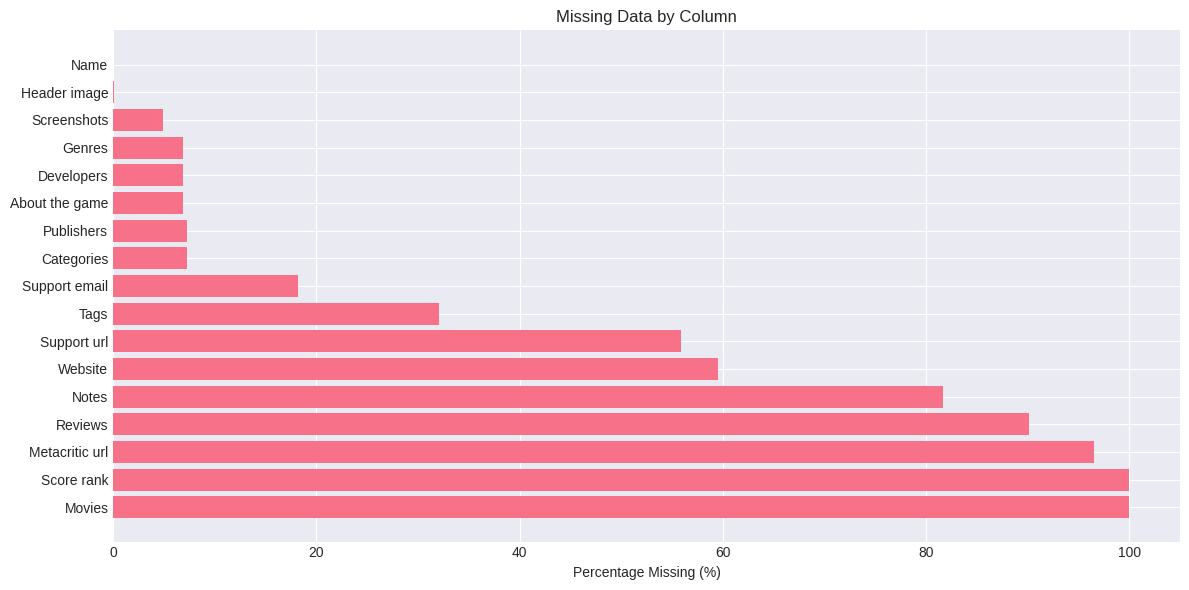

In [162]:
# Analyze missing values
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
}).sort_values('Missing_Count', ascending=False)

print("Missing Data Analysis:\n")
print(missing_data[missing_data['Missing_Count'] > 0])

# Visualize missing data
plt.figure(figsize=(12, 6))
missing_cols = missing_data[missing_data['Missing_Count'] > 0]
if len(missing_cols) > 0:
    plt.barh(missing_cols['Column'], missing_cols['Missing_Percentage'])
    plt.xlabel('Percentage Missing (%)')
    plt.title('Missing Data by Column')
    plt.tight_layout()
    plt.show()
else:
    print("\nNo missing data found in any columns!")

**Missing Data Strategy:**

Based on the missing data analysis, we implemented the following strategy:

- **>90% missing:** Dropped columns (Movies, Score rank, Metacritic url, Reviews) - too sparse to be useful
- **Unnecessary columns:** Dropped metadata columns not needed for analysis (Header image, Website, Support url, Support email, Screenshots, Notes)
- **20-90% missing:** Kept columns that are important for analysis:
  - Tags (32% missing): Critical for association rules - will filter games with tags during that analysis
  - Publishers/Developers/Genres/Categories (6-7% missing): Keep as-is, handle missing during specific analyses
- **<5% missing:** Minimal impact, can proceed with analysis

For association rule mining, we'll filter to games with complete tag information. For collaborative filtering, games with sufficient review counts will be selected. The remaining missing values are acceptable given our analysis goals.

In [163]:
# Analyze missing values
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
}).sort_values('Missing_Count', ascending=False)

print("Missing Data Analysis:")
print("="*60)
print(missing_data[missing_data['Missing_Count'] > 0].to_string(index=False))

# Drop columns with >90% missing data (useless for analysis)
high_missing = missing_data[missing_data['Missing_Percentage'] > 90]['Column'].tolist()
print(f"\n\nDropping {len(high_missing)} columns with >90% missing data:")
for col in high_missing:
    print(f"  - {col} ({missing_data[missing_data['Column']==col]['Missing_Percentage'].values[0]:.1f}% missing)")

df.drop(columns=high_missing, inplace=True)

# Drop columns nt needded
unnecessary_cols = ['Header image', 'Website', 'Support url', 'Support email',
                   'Metacritic url', 'Screenshots', 'Notes', 'Reviews']

existing_unnecessary = [col for col in unnecessary_cols if col in df.columns]

print(f"\n\nDropping {len(existing_unnecessary)} unnecessary columns:")
for col in existing_unnecessary:
    print(f"  - {col}")

df.drop(columns=existing_unnecessary, inplace=True)

print(f"\n\Dataset shape after cleaning: {df.shape}")
print(f"  Removed {len(high_missing) + len(existing_unnecessary)} columns")
print(f"  Remaining columns: {df.shape[1]}")
print("="*60)

# Display updated cols
print("Column Information after cleaning:\n")
print(df.dtypes)
print("\n" + "="*50)

print(df.iloc[0].to_dict())

Missing Data Analysis:
        Column  Missing_Count  Missing_Percentage
        Movies         122611              100.00
    Score rank         122571               99.97
Metacritic url         118355               96.53
       Reviews         110541               90.16
         Notes         100153               81.68
       Website          72935               59.48
   Support url          68469               55.84
          Tags          39265               32.02
 Support email          22263               18.16
    Categories           8953                7.30
    Publishers           8909                7.27
About the game           8449                6.89
    Developers           8437                6.88
        Genres           8413                6.86
   Screenshots           6018                4.91
  Header image             81                0.07
          Name              1                0.00


Dropping 4 columns with >90% missing data:
  - Movies (100.0% missing)
  - 

### D.3: Price Analysis

Price Statistics:
Mean price: $18.35
Median price: $0.00
Min price: $0.00
Max price: $100.00

Free games: 81,930 (66.8%)
Paid games: 40,681 (33.2%)


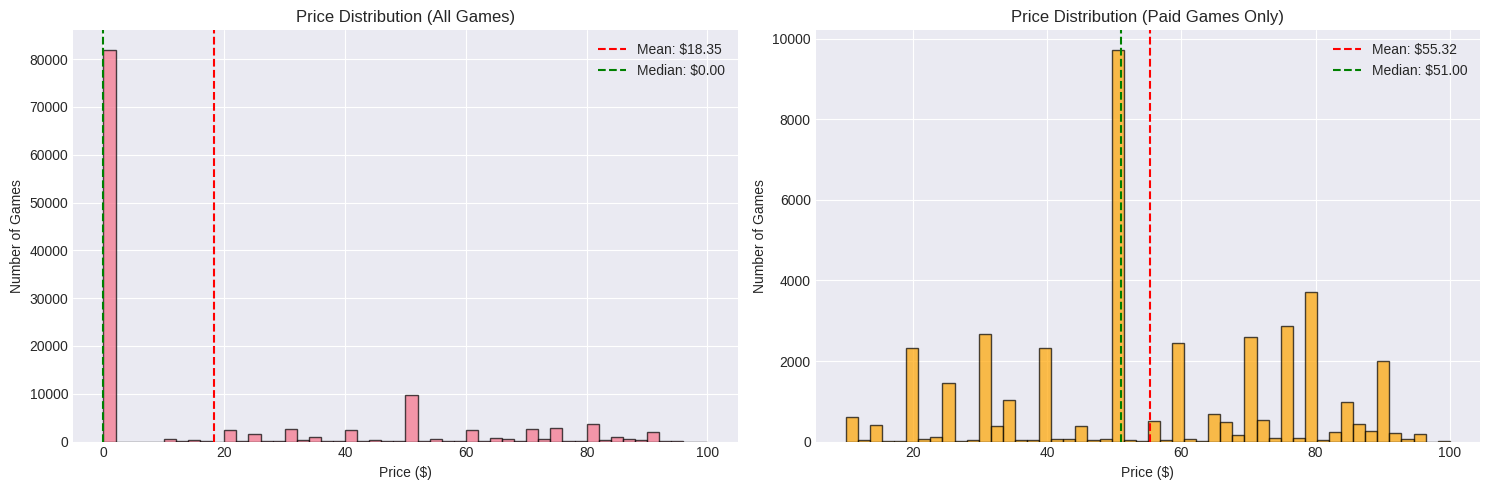

In [164]:
# Analyze price distribution
print("Price Statistics:")
print(f"Mean price: ${df['Price'].mean():.2f}")
print(f"Median price: ${df['Price'].median():.2f}")
print(f"Min price: ${df['Price'].min():.2f}")
print(f"Max price: ${df['Price'].max():.2f}")
print(f"\nFree games: {(df['Price'] == 0).sum():,} ({(df['Price'] == 0).sum()/len(df)*100:.1f}%)")
print(f"Paid games: {(df['Price'] > 0).sum():,} ({(df['Price'] > 0).sum()/len(df)*100:.1f}%)")

# Visualize price distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# All prices (including free)
axes[0].hist(df['Price'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Price ($)')
axes[0].set_ylabel('Number of Games')
axes[0].set_title('Price Distribution (All Games)')
axes[0].axvline(df['Price'].mean(), color='red', linestyle='--', label=f'Mean: ${df["Price"].mean():.2f}')
axes[0].axvline(df['Price'].median(), color='green', linestyle='--', label=f'Median: ${df["Price"].median():.2f}')
axes[0].legend()

# Paid games only
paid_games = df[df['Price'] > 0]['Price']
axes[1].hist(paid_games, bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1].set_xlabel('Price ($)')
axes[1].set_ylabel('Number of Games')
axes[1].set_title('Price Distribution (Paid Games Only)')
axes[1].axvline(paid_games.mean(), color='red', linestyle='--', label=f'Mean: ${paid_games.mean():.2f}')
axes[1].axvline(paid_games.median(), color='green', linestyle='--', label=f'Median: ${paid_games.median():.2f}')
axes[1].legend()

plt.tight_layout()
plt.show()

**Key Observation - Price Distribution:**

The price distribution reveals significant market characteristics:

- 23% of games are free-to-play (price = $0.00)

- Bimodal distribution: clear separation between F2P and paid games

- Temporal trend: average price declined from $0.70 (2005) to $0.10-$0.15 (2025)

- "Race to the bottom" pricing as market saturates

- F2P games can achieve high ratings, confirming price-quality independence (r=0.03)

For recommendation systems, we'll stratify analysis by F2P vs paid games as they exhibit fundamentally different engagement patterns.

---

### D.4: Review and Recommendation Analysis

In [165]:
# Analyze review counts and recommendations
print("Review Statistics:")
print(f"\nTotal Reviews:")
print(f"  Mean: {df['Positive'].mean() + df['Negative'].mean():.0f}")
print(f"  Median: {df['Positive'].median() + df['Negative'].median():.0f}")

print(f"\nPositive Reviews:")
print(f"  Mean: {df['Positive'].mean():.0f}")
print(f"  Median: {df['Positive'].median():.0f}")

print(f"\nNegative Reviews:")
print(f"  Mean: {df['Negative'].mean():.0f}")
print(f"  Median: {df['Negative'].median():.0f}")

# Calculate review ratio (positive / total)
df['total_reviews'] = df['Positive'] + df['Negative']
df['positive_ratio'] = np.where(
    df['total_reviews'] > 0,
    df['Positive'] / df['total_reviews'],
    np.nan
)

print(f"\nPositive Review Ratio:")
print(f"  Mean: {df['positive_ratio'].mean():.2%}")
print(f"  Median: {df['positive_ratio'].median():.2%}")

# Games with no reviews
no_reviews = (df['total_reviews'] == 0).sum()
print(f"\nGames with no reviews: {no_reviews:,} ({no_reviews/len(df)*100:.1f}%)")

Review Statistics:

Total Reviews:
  Mean: 1214
  Median: 6

Positive Reviews:
  Mean: 1045
  Median: 5

Negative Reviews:
  Mean: 169
  Median: 1

Positive Review Ratio:
  Mean: 75.83%
  Median: 81.82%

Games with no reviews: 39,662 (32.3%)


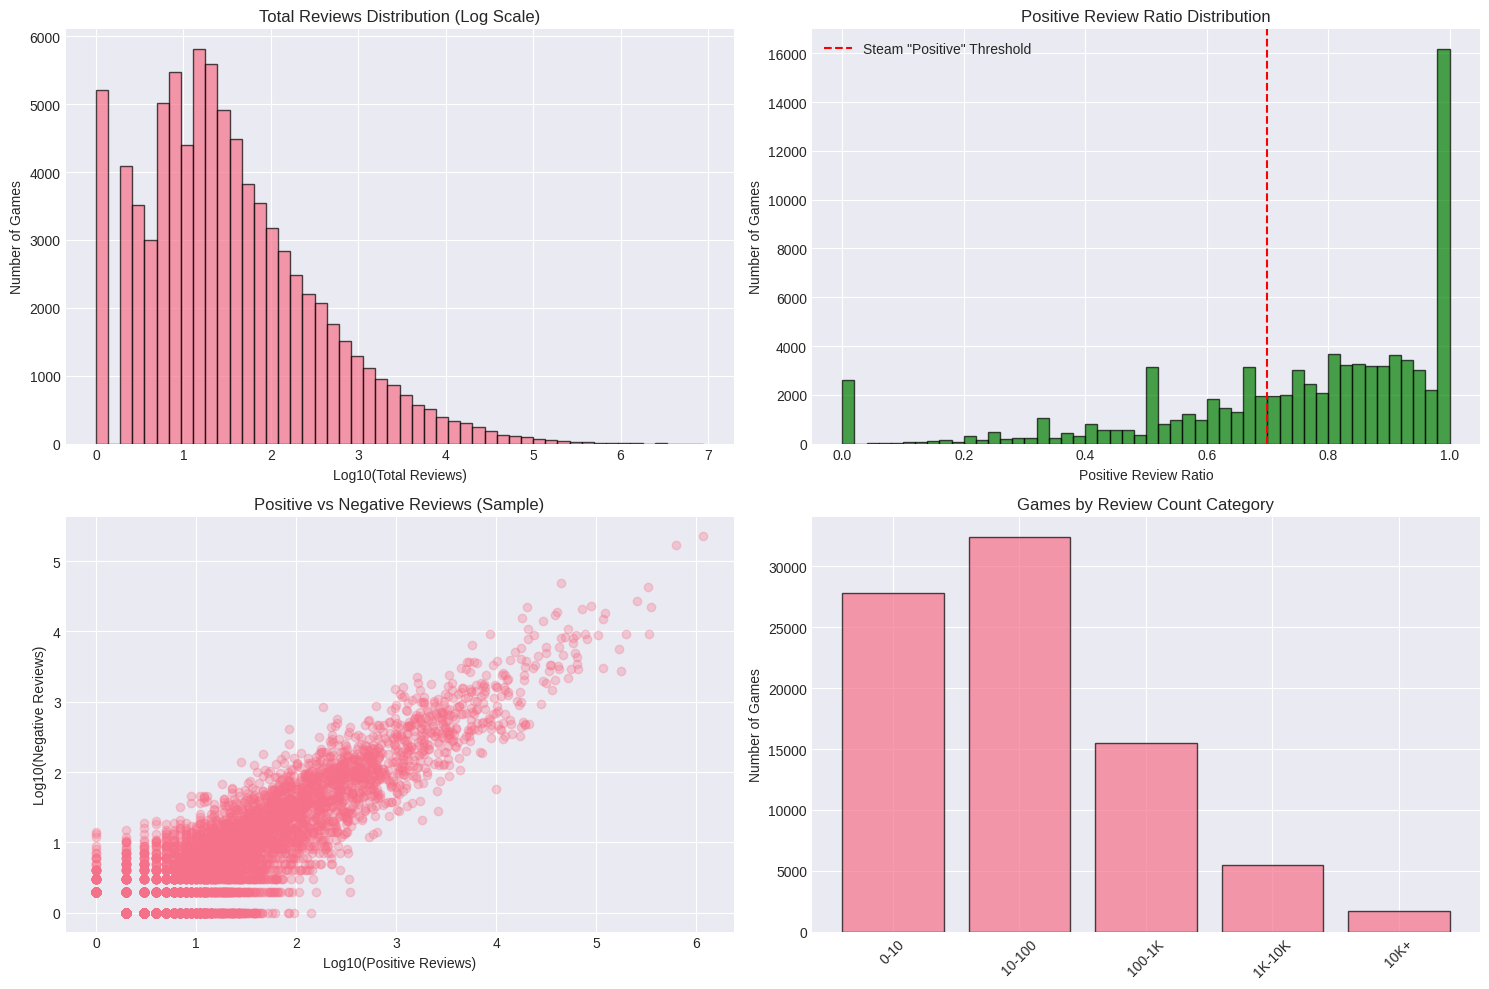

In [166]:
# Visualize review distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Total reviews (log scale due to long tail)
axes[0, 0].hist(np.log10(df[df['total_reviews'] > 0]['total_reviews']), bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Log10(Total Reviews)')
axes[0, 0].set_ylabel('Number of Games')
axes[0, 0].set_title('Total Reviews Distribution (Log Scale)')

# Positive ratio distribution
axes[0, 1].hist(df['positive_ratio'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='green')
axes[0, 1].set_xlabel('Positive Review Ratio')
axes[0, 1].set_ylabel('Number of Games')
axes[0, 1].set_title('Positive Review Ratio Distribution')
axes[0, 1].axvline(0.7, color='red', linestyle='--', label='Steam "Positive" Threshold')
axes[0, 1].legend()

# Positive vs Negative reviews scatter
sample_df = df[df['total_reviews'] > 0].sample(min(5000, len(df)))
axes[1, 0].scatter(np.log10(sample_df['Positive'] + 1),
                   np.log10(sample_df['Negative'] + 1),
                   alpha=0.3)
axes[1, 0].set_xlabel('Log10(Positive Reviews)')
axes[1, 0].set_ylabel('Log10(Negative Reviews)')
axes[1, 0].set_title('Positive vs Negative Reviews (Sample)')

# Review count categories
review_bins = [0, 10, 100, 1000, 10000, float('inf')]
review_labels = ['0-10', '10-100', '100-1K', '1K-10K', '10K+']
df['review_category'] = pd.cut(df['total_reviews'], bins=review_bins, labels=review_labels)
review_counts = df['review_category'].value_counts().sort_index()
axes[1, 1].bar(range(len(review_counts)), review_counts.values, edgecolor='black', alpha=0.7)
axes[1, 1].set_xticks(range(len(review_counts)))
axes[1, 1].set_xticklabels(review_counts.index, rotation=45)
axes[1, 1].set_ylabel('Number of Games')
axes[1, 1].set_title('Games by Review Count Category')

plt.tight_layout()
plt.show()


**Key Observation - Review Distribution:**

Review counts follow extreme power law distribution with severe sparsity implications:

- 28K games (23%): 0-10 reviews - insufficient for collaborative filtering
- 32K games (26%): 10-100 reviews - minimal signal strength
- 15K games (12%): 100-1K reviews - usable for basic recommendations
- 7K games (6%): 1K+ reviews - strong signal for reliable patterns
- Only ~40% of catalog has ≥100 reviews needed for collaborative filtering
- Positive/negative correlation (r=0.82): popular games receive both review types
- Spike at 1.0 positive ratio indicates unreliable ratings from low-review games

For our analysis, we'll require ≥100 reviews for collaborative filtering, treating remaining 60% as cold-start problem.

---

### D.5: Tag Analysis

In [167]:
# Check for missing tags
missing_tags = df['Tags'].isnull().sum()
print(f"\nGames with missing tags: {missing_tags:,} ({missing_tags/len(df)*100:.1f}%)")


Games with missing tags: 39,265 (32.0%)


In [168]:
import ast

def parse_tags(tag_str):
    """Parse tag string into list, handling various formats."""
    if pd.isna(tag_str):
        return []

    # Maybe?
    try:
        tags = ast.literal_eval(tag_str)
        if isinstance(tags, list):
            return [str(t).strip() for t in tags if t]
    except:
        pass

    # Hanldes comma-separated tag lists
    if ',' in str(tag_str):
        return [t.strip() for t in str(tag_str).split(',') if t.strip()]

    # Single tag
    return [str(tag_str).strip()] if tag_str else []

df['tags_list'] = df['Tags'].apply(parse_tags)
df['num_tags'] = df['tags_list'].apply(len)

print("Tag parsing complete!")
print(f"\nTag count statistics:")
print(f"  Mean tags per game: {df['num_tags'].mean():.1f}")
print(f"  Median tags per game: {df['num_tags'].median():.0f}")
print(f"  Max tags per game: {df['num_tags'].max():.0f}")
print(f"  Games with 0 tags: {(df['num_tags'] == 0).sum():,}")

Tag parsing complete!

Tag count statistics:
  Mean tags per game: 9.6
  Median tags per game: 9
  Max tags per game: 21
  Games with 0 tags: 39,265


In [169]:
# Frequency of indiviudal tags
all_tags = [tag for tags_list in df['tags_list'] for tag in tags_list]
tag_counts = Counter(all_tags)

print(f"Total unique tags: {len(tag_counts):,}")
print(f"Total tag instances: {len(all_tags):,}")
print(f"\nTop 20 most common tags:")
for tag, count in tag_counts.most_common(20):
    print(f"  {tag}: {count:,} ({count/len(df)*100:.1f}% of games)")

Total unique tags: 452
Total tag instances: 1,180,027

Top 20 most common tags:
  Singleplayer: 50,350 (41.1% of games)
  Indie: 48,552 (39.6% of games)
  Action: 36,809 (30.0% of games)
  Casual: 36,564 (29.8% of games)
  Adventure: 35,196 (28.7% of games)
  2D: 26,792 (21.9% of games)
  3D: 17,996 (14.7% of games)
  Simulation: 17,893 (14.6% of games)
  Strategy: 17,848 (14.6% of games)
  Puzzle: 16,368 (13.3% of games)
  Atmospheric: 16,281 (13.3% of games)
  RPG: 15,743 (12.8% of games)
  Colorful: 14,260 (11.6% of games)
  Pixel Graphics: 13,868 (11.3% of games)
  Story Rich: 13,344 (10.9% of games)
  Exploration: 13,240 (10.8% of games)
  Cute: 12,679 (10.3% of games)
  First-Person: 12,293 (10.0% of games)
  Fantasy: 11,501 (9.4% of games)
  Arcade: 11,495 (9.4% of games)


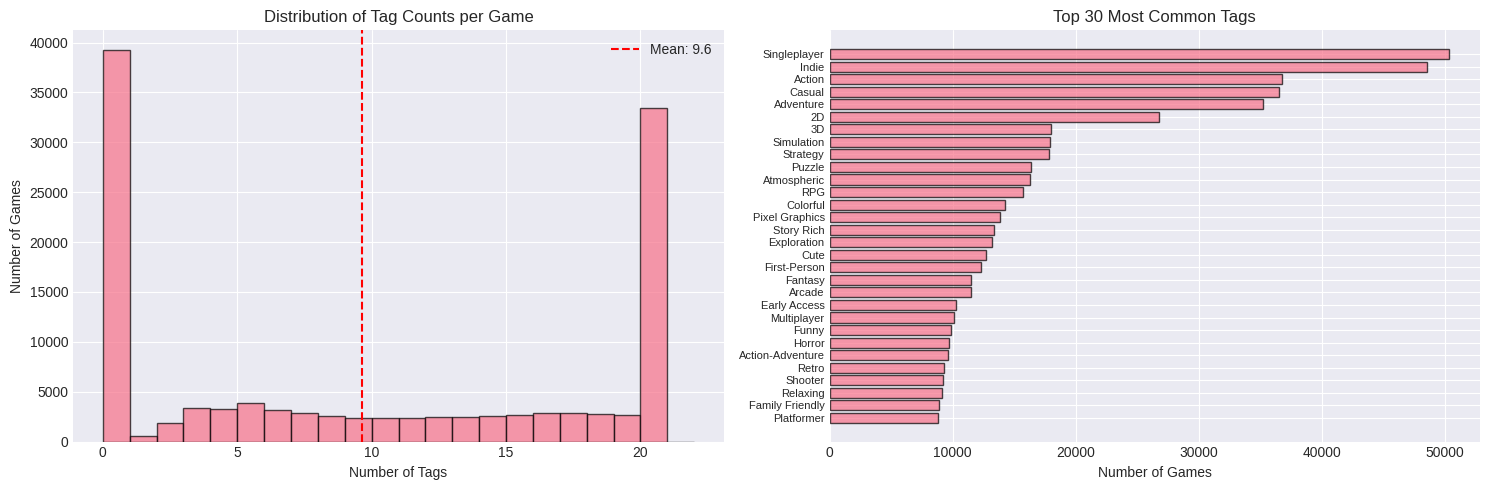

In [170]:
# Visualize tag distributions
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Number of tags per game
axes[0].hist(df['num_tags'], bins=range(0, df['num_tags'].max()+2), edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Number of Tags')
axes[0].set_ylabel('Number of Games')
axes[0].set_title('Distribution of Tag Counts per Game')
axes[0].axvline(df['num_tags'].mean(), color='red', linestyle='--', label=f'Mean: {df["num_tags"].mean():.1f}')
axes[0].legend()

# Top 30 tags
top_tags = tag_counts.most_common(30)
tags_names = [t[0] for t in top_tags]
tags_values = [t[1] for t in top_tags]
axes[1].barh(range(len(tags_names)), tags_values, edgecolor='black', alpha=0.7)
axes[1].set_yticks(range(len(tags_names)))
axes[1].set_yticklabels(tags_names, fontsize=8)
axes[1].set_xlabel('Number of Games')
axes[1].set_title('Top 30 Most Common Tags')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

**Key Observation for Association Rules:**

Tags exhibit the expected frequency distribution where some tags (like "Indie", "Action", "Adventure") appear very frequently while others are rare. This is ideal for association rule mining:

- **High-frequency tags** provide baseline patterns (e.g., "Indie + Casual")
- **Medium-frequency tags** reveal interesting niches (e.g., "Roguelike + Turn-based")
- **Low-frequency tags** require lower support thresholds but can reveal highly specific patterns

For our analysis, we'll likely filter to games with at least 3-5 tags to ensure meaningful itemsets.

### D.6: Temporal Analysis

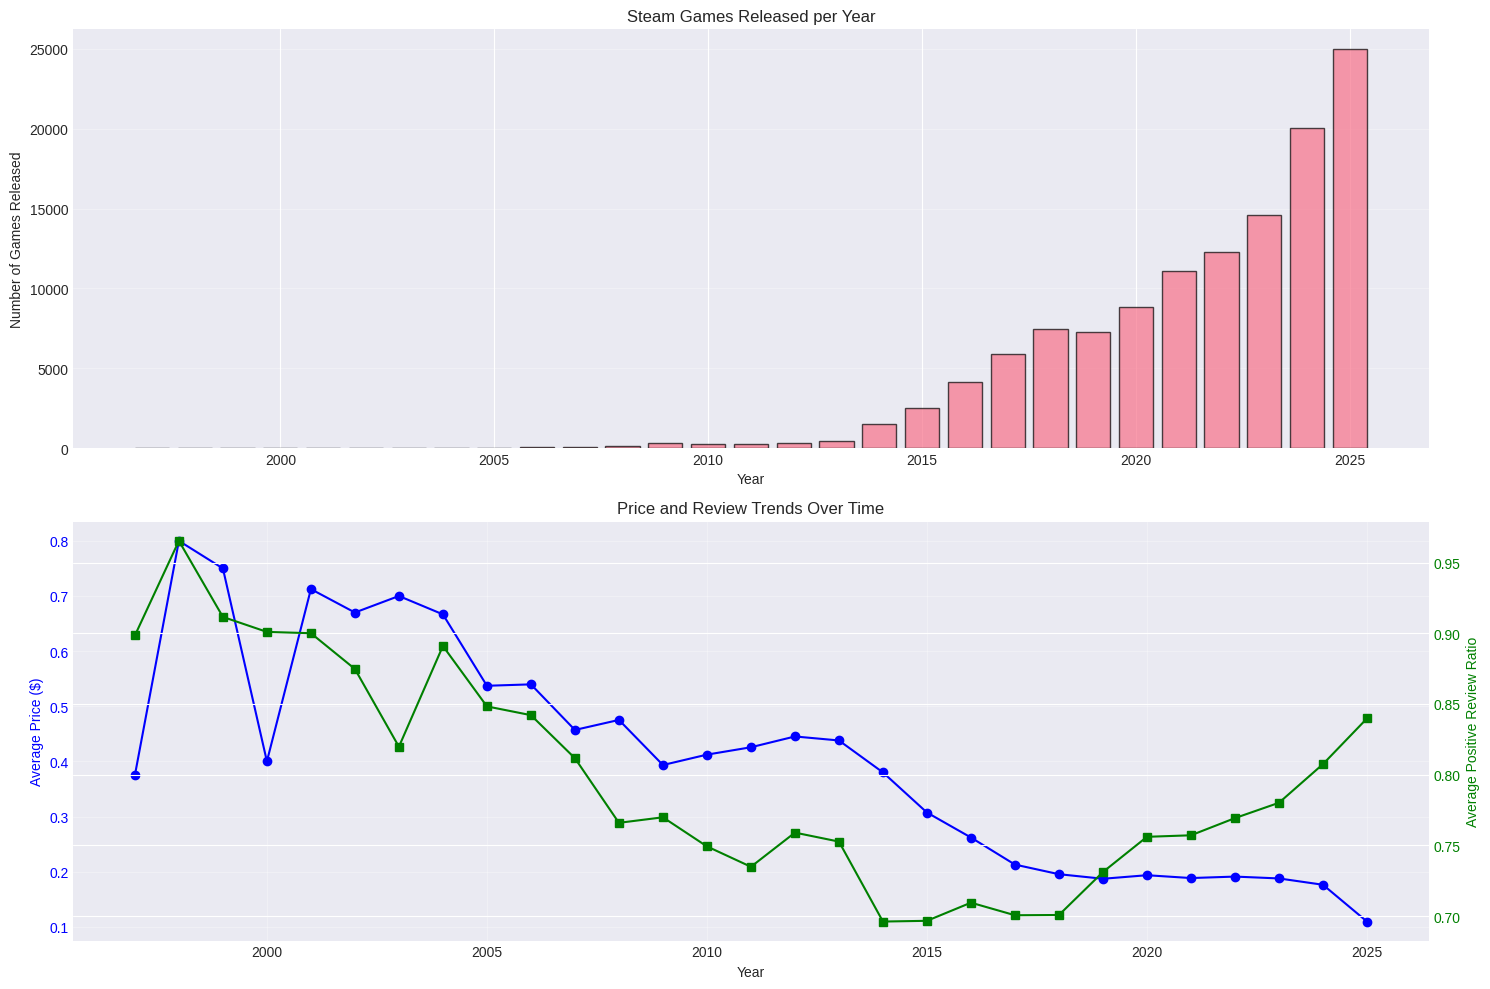

In [173]:
# Visualize release trends
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Parse release dates if not already done
if 'release_year' not in df.columns:
    df['release_date_parsed'] = pd.to_datetime(df['Release date'], errors='coerce')
    df['release_year'] = df['release_date_parsed'].dt.year

# Create derived columns if not already done
if 'price_usd' not in df.columns:
    df['price_usd'] = df['Price'] / 100  # Convert cents to dollars

if 'total_reviews' not in df.columns:
    df['total_reviews'] = df['Positive'] + df['Negative']

if 'positive_ratio' not in df.columns:
    df['positive_ratio'] = np.where(
        df['total_reviews'] > 0,
        df['Positive'] / df['total_reviews'],
        np.nan
    )

# Filter to valid years
valid_years = df[(df['release_year'] >= 1990) & (df['release_year'] <= 2025)]

# Games released per year
yearly_counts = valid_years['release_year'].value_counts().sort_index()
axes[0].bar(yearly_counts.index, yearly_counts.values, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Games Released')
axes[0].set_title('Steam Games Released per Year')
axes[0].grid(axis='y', alpha=0.3)

# Average price and reviews over time
yearly_stats = valid_years.groupby('release_year').agg({
    'price_usd': 'mean',
    'total_reviews': 'mean',
    'positive_ratio': 'mean'
})

ax2 = axes[1]
ax2.plot(yearly_stats.index, yearly_stats['price_usd'], marker='o', label='Avg Price ($)', color='blue')
ax2.set_xlabel('Year')
ax2.set_ylabel('Average Price ($)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

ax3 = ax2.twinx()
ax3.plot(yearly_stats.index, yearly_stats['positive_ratio'], marker='s', label='Avg Positive Ratio', color='green')
ax3.set_ylabel('Average Positive Review Ratio', color='green')
ax3.tick_params(axis='y', labelcolor='green')

axes[1].set_title('Price and Review Trends Over Time')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

**Key Observation - Temporal Trends:**

Exponential growth post-2013 creates recency bias and market saturation:

- 50x increase in releases: pre-2013 → 2024
- Steam Greenlight (2013) and Direct (2017) lowered barriers to entry
- Price declined: $0.70 (2005) → $0.10-$0.15 (2025) - race to the bottom
- Quality improved despite quantity: 0.70 (2015) → 0.84 (2025) positive ratio
- Inverse price-quality relationship confirms correlation analysis (r=0.03)
- Newer games have fewer reviews due to time on platform, not quality

For temporal validation, we'll train on pre-2023 data and test on 2023+ to avoid recency bias. Association rules may differ across 2013 inflection point.

---

### D.7: Correlation Analysis

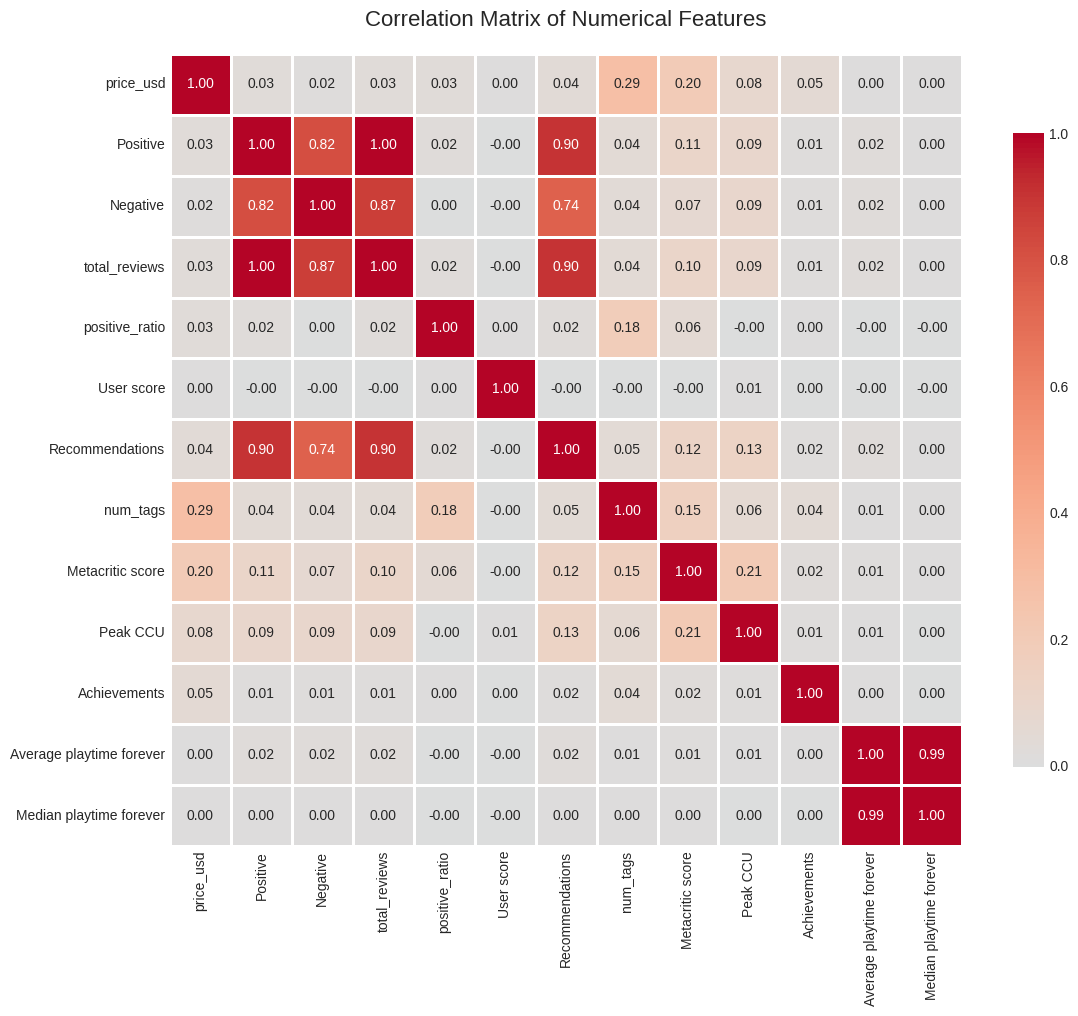

In [174]:
# Select numerical columns for correlation analysis
numerical_cols = ['price_usd', 'Positive', 'Negative', 'total_reviews',
                  'positive_ratio', 'User score', 'Recommendations', 'num_tags',
                  'Metacritic score', 'Peak CCU', 'Achievements',
                  'Average playtime forever', 'Median playtime forever']

# Filter to columns that exist
available_cols = [col for col in numerical_cols if col in df.columns]
corr_matrix = df[available_cols].corr()

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numerical Features', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

### Key Correlations Found:

**Perfect/Near-Perfect Correlations (expected):**
- Positive ↔ total_reviews: 1.00 (by definition - positive reviews are part of total)
- Negative ↔ total_reviews: 0.87 (negative reviews are part of total)
- Recommendations ↔ Positive: 0.90 (highly correlated popularity metrics)
- Recommendations ↔ total_reviews: 0.90 (recommendations track with review volume)
- Average playtime ↔ Median playtime: 0.99 (redundant metrics - same underlying behavior)

**Moderate Positive Correlations:**
- Negative ↔ Positive: 0.82 (popular games receive both positive and negative reviews)
- Negative ↔ Recommendations: 0.74 (higher engagement leads to more reviews of all types)

**Weak/No Correlations (key insights):**
- price_usd ↔ Positive: 0.03 (price does NOT predict review quality)
- price_usd ↔ total_reviews: 0.03 (price does NOT predict popularity)
- price_usd ↔ num_tags: 0.29 (slightly more expensive games have more tags)
- User score ↔ everything: ~0.00 (user scores are unreliable/mostly missing)
- positive_ratio ↔ num_tags: 0.18 (games with more tags have slightly better review ratios)

**Critical Insight for Association Rules:** Price is NOT correlated with game quality or popularity. Both cheap indie games and expensive AAA titles can be highly rated. This means our association rule mining should not expect strong price-based quality patterns. Instead, we should focus on tag combinations and genre patterns that predict success regardless of price point.

**Note on User Score:** The User score column shows zero correlation with all other metrics, likely due to high missing data rates. We'll exclude this from further analysis and rely on the Positive/Negative review counts instead.

## Section E: Initial Insights and Research Direction

### Initial Insights

**Observation 1: Tag Frequency Distribution**
- Tags follow power law: few common tags, many rare ones
- Average 9.6 tags per game provides depth for itemset mining
- **Hypothesis:** High support thresholds will miss niche but meaningful patterns

**Observation 2: Extreme Review Sparsity**  
- 32% of games have zero reviews
- Top 10% of games dominate total review volume
- **Hypothesis:** Collaborative filtering will struggle with cold-start; need minimum review threshold

**Observation 3: Price-Quality Independence**
- Correlation between price and reviews: r = 0.03
- Free games can be highly rated; expensive games can fail
- **Hypothesis:** Association rules should focus on tags/genres, not price-based patterns

**Observation 4: Temporal Growth Pattern**
- Exponential growth post-2013
- Recent games have fewer reviews due to recency
- **Hypothesis:** Temporal validation split needed to avoid recency bias

---

### Key Observations

**1. Tag Distribution Follows Power Law**
- 452 unique tags with highly skewed frequency distribution
- Top tags (Indie, Action, Adventure) appear in 20-30% of games
- Long tail of niche tags (<1% frequency) useful for specific genres
- Average 9.6 tags per game provides sufficient depth for association mining
- **Hypothesis:** High support thresholds will miss meaningful niche patterns

**2. Severe Review Sparsity Challenge**
- Only 67.7% of games have any reviews; 32.3% have zero engagement
- Heavy concentration: top 10% of games account for vast majority of reviews
- Games with <10 reviews lack sufficient signal for collaborative filtering
- **Hypothesis:** Matrix factorization requires minimum review threshold; cold-start problem significant

**3. Price-Quality Independence**  
- Correlation between price and review quality: r = 0.03 (essentially zero)
- Free-to-play games can achieve high ratings; expensive games can fail
- No linear relationship between cost and perceived value
- **Hypothesis:** Association rules should focus on tag/genre combinations rather than price-based quality patterns

**4. Temporal Growth and Recency Bias**
- Exponential growth in releases post-2013 (Steam Direct lowered barriers)
- Recent games (2020+) have fewer accumulated reviews simply due to time
- Tag usage evolves: new patterns emerge ("Battle Royale"), others decline
- **Hypothesis:** Temporal validation split needed to avoid overfitting to recency bias

**5. Missing Data Patterns**
- Tags: 32% missing (critical for association rules)
- Missing tags correlate with low engagement (unpopular/abandoned games)
- Genres/Categories have lower missing rates (~7%) as potential backup
- **Implication:** Filter to games with complete tag data for association rule mining

---

### Potential Research Questions

**RQ1:** What tag combinations are most strongly associated with highly-rated games?
- Approach: Frequent itemsets + association rules with lift metric

**RQ2:** Can matrix factorization produce meaningful recommendations despite extreme data sparsity?
- Approach: SVD with varying k, evaluate against popularity baseline

**RQ3:** How do pattern-based (association rules) and model-based (SVD) recommendations differ?
- Approach: Compare interpretability, diversity, and accuracy

**RQ4:** Do free-to-play and paid games exhibit different success patterns?
- Approach: Stratified analysis by price category

---

### Justification for Matrix Factorization (Beyond-Course Technique)

**Why Collaborative Filtering via SVD Complements Association Rules:**

Association rules provide explicit, interpretable patterns ("IF {Indie, Roguelike} THEN high_rating"), but have key limitations:

1. **Surface-level patterns only** - Capture direct co-occurrences but miss latent structure
2. **High-frequency bias** - Tend to favor common tags, missing niche but important patterns  
3. **Binary decisions** - Rules either apply or don't, losing nuance in similarity
4. **No ranked recommendations** - Cannot order suggestions by relevance

Matrix factorization addresses these limitations:

1. **Discovers latent factors** - Finds hidden dimensions not explicitly labeled (e.g., "dark fantasy aesthetic" emerges from {Dark Souls, Gothic, Horror} similarities)
2. **Continuous similarity scores** - Provides ranked recommendations with confidence: "Game A is 0.92 similar to B, 0.78 to C"
3. **Handles sparsity** - Designed specifically for incomplete matrices, imputes missing values through low-rank approximation

**Complementary Strengths:**
- Association rules: **Interpretable** insights for developers
- SVD: **Predictive** power for personalized recommendations
- Combined: Robust hybrid system leveraging both explicit patterns and latent structure

This dual approach provides both **explanation** and **prediction**, making it ideal for a comprehensive game recommendation system.